In [1]:
#LETS WORK WITH CIFAR 10 DATA 

# OBJECTIVE 

IN SESSION 10 we have applied reduce LR on plateau with RESNET 

RESULT :90% ACC ON 50 TH EPOCH 

IN SESSON 11 PART 1 

S11_ONE_CYCLE_POLICY_RESNET.ipynb

we have applied Onecycle LR with RESNET 

RESULT :90% ACC ON 25TH EPOCH 91.02 on 30TH EPOCH 

**IN SESSION 11 PART 2** 

**S11_ONE_CYCLE_POLICY_DAVIDNET.ipynb**

**We have applied Onecycle LR with DAVID NET** 

**RESULT: 90 % ACC ON 20TH EPOCH**


In [2]:
!nvidia-smi

Sat Apr 17 09:07:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#STEP1:Install Albumentation

In [4]:
!pip install -U albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.7/dist-packages (0.5.2)


In [5]:
#STEP 2 :Import in built library 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor


In [6]:
#STEP 3 : DELETE OLD GIT FOLDER AND CLONE NEW ONE 
%rm -r /content/SWAG_DNN
!git clone https://github.com/jitendramishra1024/SWAG_DNN.git
%cd SWAG_DNN

Cloning into 'SWAG_DNN'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 211 (delta 118), reused 148 (delta 60), pack-reused 0
Receiving objects: 100% (211/211), 222.23 KiB | 27.78 MiB/s, done.
Resolving deltas: 100% (118/118), done.
/content/SWAG_DNN


In [7]:
#STEP 4 :import userdefined library

from SWAG_DNN.utils import Dataloader 
from SWAG_DNN.utils import show_images
from SWAG_DNN.utils import classcount
from SWAG_DNN.utils import perClassResult
from SWAG_DNN.utils import plot_misclassified_image
from SWAG_DNN.utils import useful_utils
from SWAG_DNN.utils import gradcam
from SWAG_DNN.utils import Albumentations
from SWAG_DNN.models import BasicModel
from SWAG_DNN.models import RESNET
from SWAG_DNN.models import DAVIDNET
from SWAG_DNN.trainer import train
from SWAG_DNN.trainer import test
from SWAG_DNN.utils.lr_finder import LRFinder

In [8]:
#STEP :5 Define parameters 

class Args:

    # Data Loading
    # ============

    # train_batch_size = 64
    # val_batch_size = 64
    num_workers = 4
    #batch_size = 512
    batch_size = 512


    # Regularization
    # ==============
    dropout = 0
    lambda_l2=5e-4
    lambda_l1=0

    # Training
    # ========
    random_seed = 1
    epochs = 30
    learning_rate = 0.01
    momentum = 0.9
    step_size=12


In [9]:
#get mean and standard deviation of images 

trainset = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transforms.ToTensor())
mean,std = Dataloader.calculate_mean_std(trainset)

# mean =[0.5,0.5,0.5]
# std =[0.5,0.5,0.5]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [10]:
train_transform_album = Albumentations.album_compose_train(mean,std)
test_transform_album = Albumentations.album_compose_test(mean,std)

trainloader,testloader=Dataloader.train_test_loader_with_Albumentation(Args.batch_size,Args.num_workers,train_transform_album,test_transform_album)
classes = Dataloader.get_classes()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

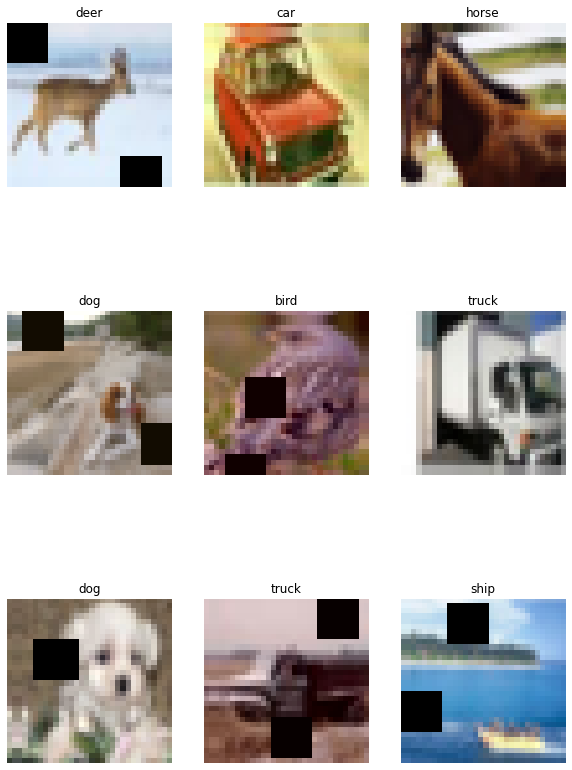

In [11]:
#plot  n raw images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='raw')


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

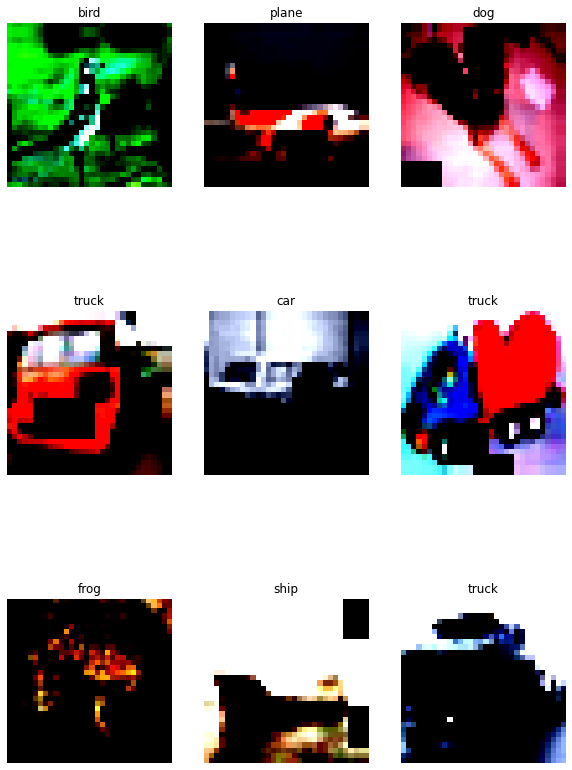

In [12]:
#plot  n normalized images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [13]:

dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
class_count = classcount.get_train_class_count(dataset,classes)
print(class_count)

Files already downloaded and verified
{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


In [14]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#working 
#model = BasicModel.Net().to(device)

#RESNET
# model = RESNET.ResNet18().to(device) 

#DAVIDNET 
model = DAVIDNET.DAVIDNET().to(device) 

summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

In [15]:
#FIND BEST POSSIBLE LR 


In [16]:
import torch.nn as nn
import torch.optim as optim
min_lr=1e-06
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=min_lr,momentum=Args.momentum,weight_decay=0.005 )
lr_finder = LRFinder(model, optimiser, criterion, device="cuda")


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.33E-03


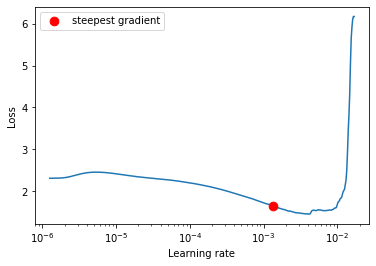

best LR With steepest descent  0.0013341623512779309
best LR With minimum loss  0.004130729071659684


In [17]:
## FIND BEST LR AND PLOT BETWEEN 10-6 and 1 
lr_finder.range_test(trainloader, val_loader=testloader,start_lr=1e-06,end_lr=1, num_iter=600 ,step_mode="exp")
_,best_descent_lr=lr_finder.plot()
## Extract Best LR with minimum losss 
Best_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(lr_finder.best_loss)]
print("best LR With steepest descent ", best_descent_lr)
print("best LR With minimum loss ",Best_lr)
lr_finder.reset() # to reset the model and optimizer to their initial state

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.98E-02


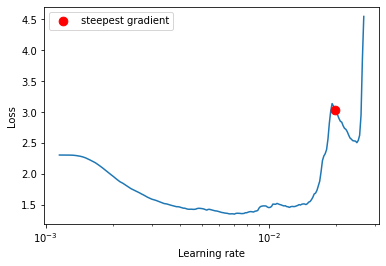

best LR With steepest descent  0.019764610289769453
best LR With minimum loss  0.007005075401472828


In [18]:
# FIND BEST LR AND PLOT BETWEEN 10-3 and 7e-02
lr_finder = LRFinder(model, optimiser, criterion, device="cuda")
lr_finder.range_test(trainloader, val_loader=testloader,start_lr=1e-03, end_lr=7e-02, num_iter=300 ,step_mode="exp")
_,best_descent_lr=lr_finder.plot()
## Extract Best LR with minimum losss 
Best_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(lr_finder.best_loss)]
print("best LR With steepest descent ", best_descent_lr)
print("best LR With minimum loss ",Best_lr)
lr_finder.reset() # to reset the model and optimizer to their initial state

In [19]:
 1.10E-02


0.011

In [20]:
#initialize loss , scheduler , optimizer 


In [21]:
## **Initialise Loss funtion, Optimizer, Schedular**
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import OneCycleLR
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.015,momentum=0.9 ,weight_decay = 0.0001)
#scheduler = ReduceLROnPlateau(optimizer, patience = 3)
scheduler = OneCycleLR(optimizer, max_lr = 0.015, total_steps=None, epochs=30, steps_per_epoch=len(trainloader), pct_start=0.20, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85, max_momentum=0.95, div_factor=8,final_div_factor =1)

In [22]:

# import torch.optim as optim
# from torch.optim.lr_scheduler import StepLR
# lossfunc = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=Args.learning_rate, momentum=Args.momentum,weight_decay=Args.lambda_l2)
# scheduler = StepLR(optimizer, step_size=Args.step_size, gamma=0.1)


In [23]:
#Test
EPOCHS = Args.epochs

EPOCHS = 30
trainer = train.Trainer()
tester  = test.Tester()
Lr_track=[]
lossfunc=criterion

for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
  Lr_track.append(optimizer.param_groups[0]['lr'])
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, Args.lambda_l1,scheduler)
  tester.test(model, device, testloader)

test_losses,test_acc=tester.getValuesTest()
train_losses,train_acc=trainer.getValuesTrain()

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.001875


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train set: Loss=1.3037861585617065 Batch_id=97 Accuracy=38.36: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2570, Test Accuracy: 5492/10000 (54.92%)

EPOCH: 2 LR: 0.004066226575809199


Train set: Loss=1.0352399349212646 Batch_id=97 Accuracy=57.54: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0233, Test Accuracy: 6461/10000 (64.61%)

EPOCH: 3 LR: 0.006257453151618398


Train set: Loss=0.9480570554733276 Batch_id=97 Accuracy=65.73: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8957, Test Accuracy: 6962/10000 (69.62%)

EPOCH: 4 LR: 0.008448679727427598


Train set: Loss=0.7120997309684753 Batch_id=97 Accuracy=71.04: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6842, Test Accuracy: 7646/10000 (76.46%)

EPOCH: 5 LR: 0.010639906303236796


Train set: Loss=0.6848685145378113 Batch_id=97 Accuracy=74.44: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6928, Test Accuracy: 7770/10000 (77.70%)

EPOCH: 6 LR: 0.012831132879045996


Train set: Loss=0.7644230127334595 Batch_id=97 Accuracy=75.74: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7681, Test Accuracy: 7531/10000 (75.31%)

EPOCH: 7 LR: 0.014994419642857143


Train set: Loss=0.8051562309265137 Batch_id=97 Accuracy=79.42: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6902, Test Accuracy: 7927/10000 (79.27%)

EPOCH: 8 LR: 0.014447544642857142


Train set: Loss=0.5576413869857788 Batch_id=97 Accuracy=81.45: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5493, Test Accuracy: 8273/10000 (82.73%)

EPOCH: 9 LR: 0.013900669642857142


Train set: Loss=0.48141714930534363 Batch_id=97 Accuracy=84.55: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5555, Test Accuracy: 8337/10000 (83.37%)

EPOCH: 10 LR: 0.013353794642857143


Train set: Loss=0.4504113495349884 Batch_id=97 Accuracy=86.27: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4680, Test Accuracy: 8488/10000 (84.88%)

EPOCH: 11 LR: 0.012806919642857142


Train set: Loss=0.3234047293663025 Batch_id=97 Accuracy=87.50: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4179, Test Accuracy: 8685/10000 (86.85%)

EPOCH: 12 LR: 0.012260044642857142


Train set: Loss=0.30294546484947205 Batch_id=97 Accuracy=89.17: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3801, Test Accuracy: 8750/10000 (87.50%)

EPOCH: 13 LR: 0.011713169642857141


Train set: Loss=0.22416909039020538 Batch_id=97 Accuracy=90.28: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3950, Test Accuracy: 8728/10000 (87.28%)

EPOCH: 14 LR: 0.011166294642857143


Train set: Loss=0.20996148884296417 Batch_id=97 Accuracy=91.48: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4078, Test Accuracy: 8713/10000 (87.13%)

EPOCH: 15 LR: 0.010619419642857142


Train set: Loss=0.1486138105392456 Batch_id=97 Accuracy=92.07: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3668, Test Accuracy: 8825/10000 (88.25%)

EPOCH: 16 LR: 0.010072544642857142


Train set: Loss=0.16299517452716827 Batch_id=97 Accuracy=92.46: 100%|██████████| 98/98 [00:25<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3589, Test Accuracy: 8906/10000 (89.06%)

EPOCH: 17 LR: 0.009525669642857143


Train set: Loss=0.25340503454208374 Batch_id=97 Accuracy=93.15: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4149, Test Accuracy: 8735/10000 (87.35%)

EPOCH: 18 LR: 0.008978794642857143


Train set: Loss=0.19238603115081787 Batch_id=97 Accuracy=94.04: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3388, Test Accuracy: 8932/10000 (89.32%)

EPOCH: 19 LR: 0.008431919642857142


Train set: Loss=0.1367647796869278 Batch_id=97 Accuracy=94.63: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3449, Test Accuracy: 8934/10000 (89.34%)

EPOCH: 20 LR: 0.007885044642857143


Train set: Loss=0.12248100340366364 Batch_id=97 Accuracy=95.09: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3322, Test Accuracy: 8952/10000 (89.52%)

EPOCH: 21 LR: 0.007338169642857142


Train set: Loss=0.14050443470478058 Batch_id=97 Accuracy=95.68: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3295, Test Accuracy: 8992/10000 (89.92%)

EPOCH: 22 LR: 0.006791294642857142


Train set: Loss=0.13911259174346924 Batch_id=97 Accuracy=96.11: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3080, Test Accuracy: 9050/10000 (90.50%)

EPOCH: 23 LR: 0.006244419642857144


Train set: Loss=0.1387454718351364 Batch_id=97 Accuracy=96.43: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3152, Test Accuracy: 9041/10000 (90.41%)

EPOCH: 24 LR: 0.005697544642857141


Train set: Loss=0.09504061192274094 Batch_id=97 Accuracy=96.92: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3194, Test Accuracy: 9056/10000 (90.56%)

EPOCH: 25 LR: 0.005150669642857143


Train set: Loss=0.09816566854715347 Batch_id=97 Accuracy=96.97: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3171, Test Accuracy: 9037/10000 (90.37%)

EPOCH: 26 LR: 0.004603794642857144


Train set: Loss=0.09166517108678818 Batch_id=97 Accuracy=97.40: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3029, Test Accuracy: 9098/10000 (90.98%)

EPOCH: 27 LR: 0.004056919642857142


Train set: Loss=0.06231857091188431 Batch_id=97 Accuracy=97.61: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3026, Test Accuracy: 9076/10000 (90.76%)

EPOCH: 28 LR: 0.003510044642857143


Train set: Loss=0.0658104345202446 Batch_id=97 Accuracy=97.86: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2946, Test Accuracy: 9098/10000 (90.98%)

EPOCH: 29 LR: 0.0029631696428571424


Train set: Loss=0.05923284962773323 Batch_id=97 Accuracy=98.06: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2990, Test Accuracy: 9087/10000 (90.87%)

EPOCH: 30 LR: 0.002416294642857142


Train set: Loss=0.06998132914304733 Batch_id=97 Accuracy=98.12: 100%|██████████| 98/98 [00:25<00:00,  3.77it/s]



Test set: Average loss: 0.2955, Test Accuracy: 9100/10000 (91.00%)



In [24]:
new_train_acc,new_train_loss=useful_utils.modify_train_loss_accuracy_from_batch_level_to_epoch_level(train_acc,train_losses,trainloader)

train_acc_mod=new_train_acc
train_losses_mod=new_train_loss
len(train_acc_mod),len(train_losses_mod),len(new_train_loss),len(Lr_track)

(30, 30, 30, 30)

In [25]:
import matplotlib.pyplot as plt
def plot_lr_metric(lr_metric):
    plt.figure(figsize=(7, 5))
    plt.plot(lr_metric)
    plt.title('Learning Rate')
    plt.show()


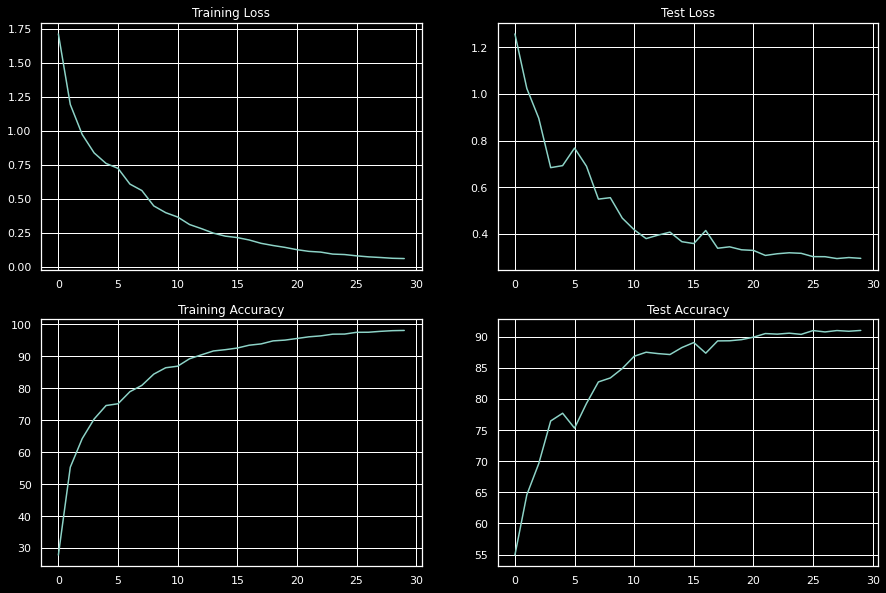

In [26]:
def plot_train_test_loss_accuracy(train_losses_mod,train_acc_mod,test_losses,test_acc):
  import seaborn as sns
  import matplotlib.pyplot as plt
  sns.set()
  plt.style.use("dark_background")

  fig, axs = plt.subplots(2,2,figsize=(15,10))
  axs[0, 0].plot(train_losses_mod)
  axs[0, 0].set_title("Training Loss")
  axs[1, 0].plot(train_acc_mod)
  axs[1, 0].set_title("Training Accuracy")
  axs[0, 1].plot(test_losses)
  axs[0, 1].set_title("Test Loss")
  axs[1, 1].plot(test_acc)
  axs[1, 1].set_title("Test Accuracy")
  plt.show()

plot_train_test_loss_accuracy(train_losses_mod,train_acc_mod,test_losses,test_acc)

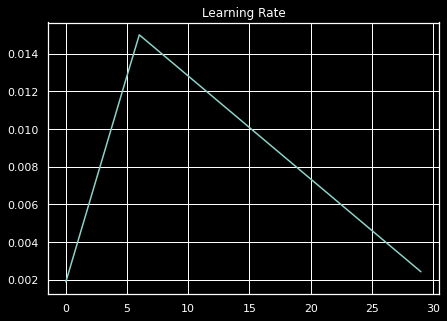

In [27]:

plot_lr_metric(Lr_track)


In [28]:

torch.save(model,'./data/cifar')


In [29]:
#load the model
model = torch.load('./data/cifar')
model.eval()

DAVIDNET(
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (x1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (R1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(128, 256, ke

In [30]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS      
perClassResult.get_percent_acc_each_class(model,device,classes,testloader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 100 %
Accuracy of   car : 88 %
Accuracy of  bird : 75 %
Accuracy of   cat : 62 %
Accuracy of  deer : 90 %
Accuracy of   dog : 83 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

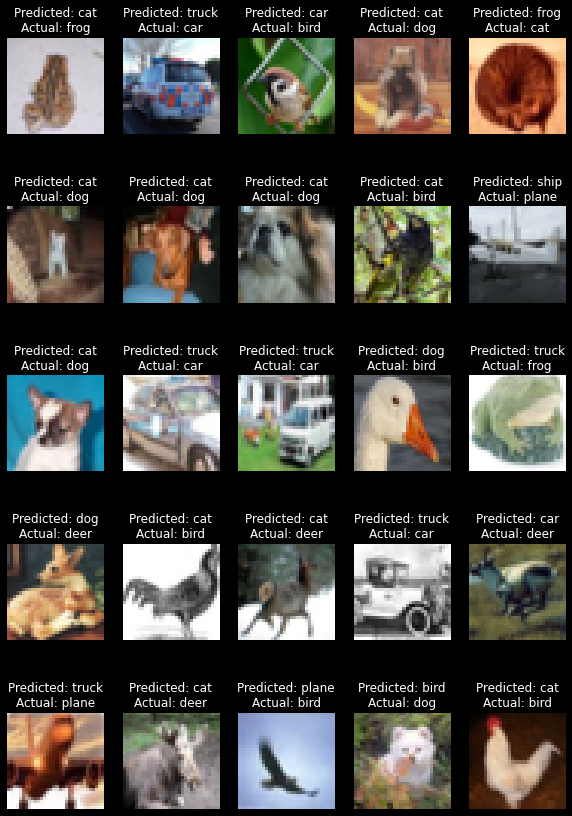

In [31]:
#Plot misclassified Image
plot_misclassified_image.plot_misclassified(25, testloader, device,model,classes,mean,std,format='raw')

In [32]:
## GRAD CAM 


In [33]:
#GRAD CAM for user defined images
# path='/content/SWAG_DNN/img'
# import PIL
# img_name =[path+'/dog.jpg',path+'/snake.jpg']
# gradcam.grad_cam_for_user_defined_images(img_name,device,mean,std,model)

In [34]:
# missed_images, predicted, actual = plot_misclassified_image.get_misclassified(model,testloader,device)

# #lets see gradcam of  4 misclassified images 
# gradcam.show_gradcam_for_n_images_only_result(25,missed_images,predicted,actual,classes,model,device,mean,std)

In [35]:
# proper_images, predicted, actual = plot_misclassified_image.get_properclassified(model,testloader,device)

# #lets see gradcam of  4 misclassified images 
# gradcam.show_gradcam_for_n_images(4,proper_images,predicted,actual,classes,model,device,mean,std)